In [1]:
pwd

'C:\\Users\\android\\ML_LAB'

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
d=pd.read_excel('ST_1.xlsx')
d

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [13]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [22]:
x=d.iloc[:,23:32]
x

,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
0,4,3,4,1,1,3,6,5,6
1,5,3,3,1,1,3,4,5,5
2,4,3,2,2,3,3,10,7,8
3,3,2,2,1,1,5,2,15,14
4,4,3,2,1,2,5,4,6,10
...,...,...,...,...,...,...,...,...,...
390,5,5,4,4,5,4,11,9,9
391,2,4,5,3,4,2,3,14,16
392,5,5,3,3,3,3,3,10,8
393,4,4,1,3,4,5,0,11,12


In [31]:
y=d['sex']
y

0      F
1      F
2      F
3      F
4      F
      ..
390    M
391    M
392    M
393    M
394    M
Name: sex, Length: 395, dtype: object

In [32]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=21)

In [33]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [34]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=7,p=2,metric='euclidean').fit(x_train_scaled,y_train)
knn.predict(x_train_scaled)
knn.score(x_train_scaled,y_train)

0.6962025316455697

In [35]:
knn.predict(x_test_scaled)
knn.score(x_test_scaled,y_test)

0.6455696202531646

In [36]:
pred=knn.predict(x_test_scaled)
matrix=classification_report(y_test,pred)
print(matrix)

              precision    recall  f1-score   support

           F       0.70      0.70      0.70        46
           M       0.58      0.58      0.58        33

    accuracy                           0.65        79
   macro avg       0.64      0.64      0.64        79
weighted avg       0.65      0.65      0.65        79



In [37]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,pred)

Text(24.0, 0.5, 'Actual value')

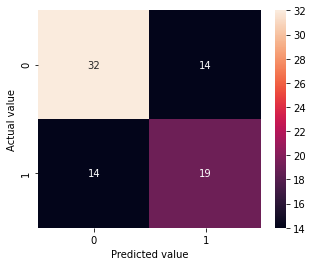

In [38]:
import seaborn as sn
from matplotlib import pyplot as plt
plt.figure(figsize=(5,4))
sn.heatmap(cm,annot=True,fmt="")
plt.xlabel('Predicted value')
plt.ylabel('Actual value')

In [46]:
x=d.iloc[:,23:32]
x

,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
0,4,3,4,1,1,3,6,5,6
1,5,3,3,1,1,3,4,5,5
2,4,3,2,2,3,3,10,7,8
3,3,2,2,1,1,5,2,15,14
4,4,3,2,1,2,5,4,6,10
...,...,...,...,...,...,...,...,...,...
390,5,5,4,4,5,4,11,9,9
391,2,4,5,3,4,2,3,14,16
392,5,5,3,3,3,3,3,10,8
393,4,4,1,3,4,5,0,11,12


In [55]:
y=d['Mjob']
y

0       at_home
1       at_home
2       at_home
3        health
4         other
         ...   
390    services
391    services
392       other
393    services
394       other
Name: Mjob, Length: 395, dtype: object

In [56]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=21)

In [57]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [58]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=7,p=2,metric='euclidean').fit(x_train_scaled,y_train)
knn.predict(x_train_scaled)
knn.score(x_train_scaled,y_train)

0.509493670886076

In [59]:
knn.predict(x_test_scaled)
knn.score(x_test_scaled,y_test)

0.25316455696202533

In [60]:
pred=knn.predict(x_test_scaled)
matrix=classification_report(y_test,pred)
print(matrix)

              precision    recall  f1-score   support

     at_home       0.20      0.27      0.23        11
      health       0.00      0.00      0.00         3
       other       0.40      0.48      0.44        29
    services       0.20      0.14      0.17        21
     teacher       0.00      0.00      0.00        15

    accuracy                           0.25        79
   macro avg       0.16      0.18      0.17        79
weighted avg       0.23      0.25      0.24        79



In [61]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,pred)

Text(24.0, 0.5, 'Actual value')

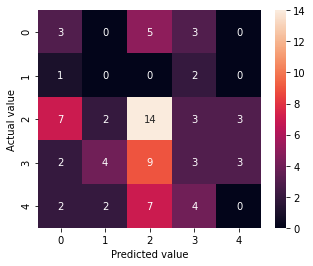

In [62]:
import seaborn as sn
from matplotlib import pyplot as plt
plt.figure(figsize=(5,4))
sn.heatmap(cm,annot=True,fmt="")
plt.xlabel('Predicted value')
plt.ylabel('Actual value')